<a href="https://colab.research.google.com/github/neogeolee/Deeplearning/blob/master/tf08_cifar10_cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/19
이름 : 이태훈
내용 : 딥러닝 cifar10 CNN 이미지 분류 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image # 파이썬 이미지 처리 라이브러리

In [ ]:
# 학습데이터 로드
(cifar10_train_data, cifar10_train_label), (cifar10_test_data, cifar10_test_label) = load_data()

# 데이터 형태 확인
print(cifar10_train_data.shape, cifar10_train_label.shape)
print(cifar10_test_data.shape, cifar10_test_label.shape)
print(cifar10_train_label)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[26574 12960 26611 44415 33636 33016 45221 26206 30008]


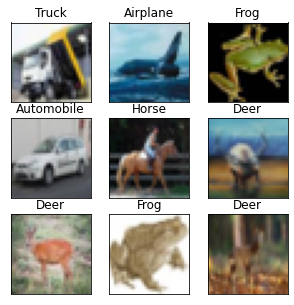

In [ ]:
# 데이터 샘플 이미지 출력
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar10_train_label[idx][0]
  plt.imshow(cifar10_train_data[idx, :])
  plt.title('%s' % class_names[label])

In [ ]:
# 데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(cifar10_train_data, cifar10_train_label)
print('훈련데이터 : ', train_data.shape)
print('검증데이터 : ', test_data.shape)

훈련데이터 :  (37500, 32, 32, 3)
검증데이터 :  (12500, 32, 32, 3)


In [ ]:
# 모델학습을 위한 데이터전처리(정규화)

# 방법1 : 픽셀데이터를 0 ~ 1 사이로 초기화 하는 정규화 -> 정확도 낮음
#train_data = train_data / 255
#test_data = test_data / 255
#cifar10_test_data = cifar10_test_data / 255


# 방법2: 픽셀데이터를 평균과 표준편차를 이용한 정규화 -> 정확도 높음
mean = np.mean(train_data, axis=(0, 1, 2))
std = np.std(train_data, axis=(0, 1, 2))

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
cifar10_test_data = (cifar10_test_data - mean) / std

# 각 데이터의 레이블을 범주형(one-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
cifar10_test_label = to_categorical(cifar10_test_label)

In [ ]:
# 학습모델 구성하기
model = Sequential()

# CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# FCNN(FUll Connection Nerual Network, 완전 연결층)
model.add(Flatten()) # 입력층
model.add(Dense(256, activation='relu')) # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층

# 모델 요약 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [ ]:
# 학습모델 설정하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# 학습하기
model.fit(train_data,
          train_label,
          epochs=20,
          batch_size=32,
          validation_data=(test_data, test_label))

Epoch 1/20
1172/1172 [==============================] - 16s 14ms/step - loss: 1.4803 - acc: 0.4519 - val_loss: 1.1307 - val_acc: 0.6029
Epoch 2/20
1172/1172 [==============================] - 16s 14ms/step - loss: 1.0194 - acc: 0.6373 - val_loss: 0.9065 - val_acc: 0.6734
Epoch 3/20
1172/1172 [==============================] - 16s 14ms/step - loss: 0.8407 - acc: 0.7024 - val_loss: 0.7631 - val_acc: 0.7321
Epoch 4/20
1172/1172 [==============================] - 16s 14ms/step - loss: 0.7380 - acc: 0.7377 - val_loss: 0.7281 - val_acc: 0.7438
Epoch 5/20
1172/1172 [==============================] - 16s 14ms/step - loss: 0.6629 - acc: 0.7666 - val_loss: 0.7158 - val_acc: 0.7520
Epoch 6/20
1172/1172 [==============================] - 16s 14ms/step - loss: 0.6108 - acc: 0.7859 - val_loss: 0.6960 - val_acc: 0.7685
Epoch 7/20
1172/1172 [==============================] - 16s 14ms/step - loss: 0.5716 - acc: 0.7984 - val_loss: 0.7038 - val_acc: 0.7624
Epoch 8/20
1172/1172 [==========================

In [ ]:
# 평가하기
# 학습할 때의 정확도와 평가할대 정확도가 차이가 난다면 과적합를 의심해야한다
model.evaluate(cifar10_test_data, cifar10_test_label)

313/313 [==============================] - 2s 7ms/step - loss: 0.7815 - acc: 0.7807


[0.7815414071083069, 0.7807000279426575]

In [ ]:
# 테스트하기
result = model.predict(cifar10_test_data)
result.round()

from sklearn.metrics import accuracy_score
score = accuracy_score(result.round(), cifar10_test_label)
print('점수 : ', score)

점수 :  0.7555
